In [5]:
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
centrals = h5py.File("../data/eagle_central_new_galaxies.h5", 'r')

In [77]:
logmstar = centrals["logmstar"][:]
logmhalo = centrals["logmhalo"][:]
x = centrals["x"][:]
y = centrals["y"][:]
z = centrals["z"][:]
g_minus_r = centrals["g_minus_r"][:]
#sfr = centrals["sfr"][:]

In [78]:
mask = logmstar > 9.0
x = x[mask]
y = y[mask]
z = z[mask]
g_minus_r = g_minus_r[mask]
logmhalo = logmhalo[mask]
logmstar = logmstar[mask]

Text(0,0.5,u'normalized counts')

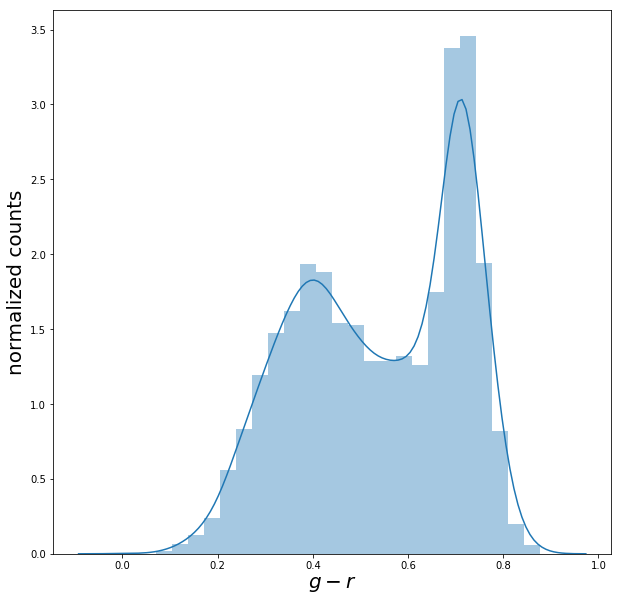

In [79]:
plt.figure(figsize = (10,10))
sns.distplot(g_minus_r)
plt.xlabel(r"$g-r$", fontsize = 20)
plt.ylabel("normalized counts" , fontsize = 20)

Text(0,0.5,u'normalized counts')

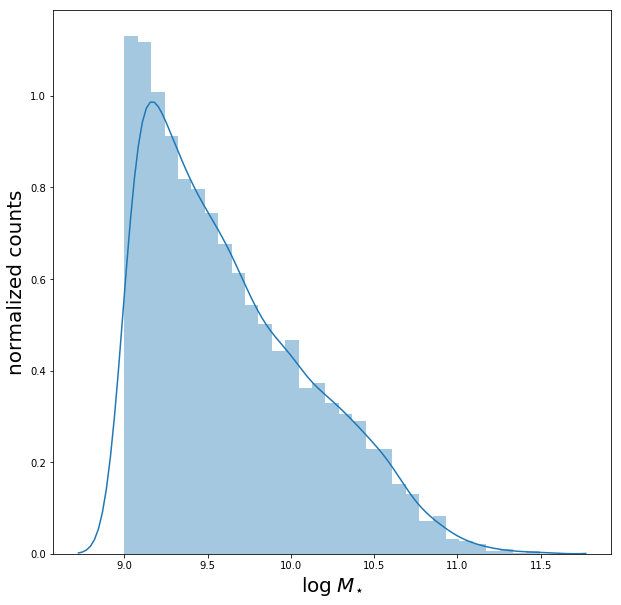

In [80]:
plt.figure(figsize = (10,10))
sns.distplot(logmstar)
plt.xlabel(r"$\log \; M_{\star}$", fontsize = 20)
plt.ylabel("normalized counts" , fontsize = 20)

In [81]:
def red_blue_split(color, logm):
    
    color_cut = 0.6 * (logm/8.5)**0.6
    
    red_mask = color > color_cut 
    
    return red_mask

In [82]:
red_mask = red_blue_split(g_minus_r, logmstar)
red_mask

array([ True,  True,  True, ...,  True, False,  True])

In [83]:
plt.figure(figsize=(10,10))


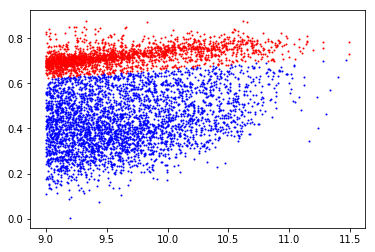

In [84]:
plt.scatter(logmstar[red_mask], g_minus_r[red_mask], s= 1. , c= "r")
plt.scatter(logmstar[~red_mask], g_minus_r[~red_mask], s= 1. , c= "b")


(array([0.00395096, 0.00790192, 0.04741154, 0.15013654, 0.31607693,
        0.77833943, 1.15368078, 1.47370866, 1.82929521, 1.89646155,
        1.57643367, 1.38283655, 1.27616059, 1.25640578, 1.45000289,
        2.62738944, 3.52820868, 1.68706059, 0.38719423, 0.06716635]),
 array([0.00406647, 0.04774256, 0.09141865, 0.13509474, 0.17877083,
        0.22244692, 0.26612301, 0.3097991 , 0.35347519, 0.39715128,
        0.44082737, 0.48450346, 0.52817955, 0.57185564, 0.61553173,
        0.65920782, 0.70288391, 0.74656   , 0.79023609, 0.83391218,
        0.87758827]),
 <a list of 20 Patch objects>)

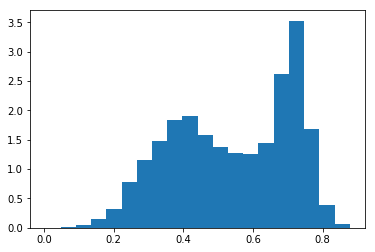

In [85]:
plt.hist(g_minus_r, bins = 20, normed = True)

(array([0.00791355, 0.00791355, 0.02374064, 0.11078965, 0.26906058,
        0.45107215, 0.98919332, 1.49566029, 2.06543565, 2.55607553,
        2.9596664 , 3.04671542, 2.83304966, 2.40571815, 2.15248466,
        2.07334919, 2.12874402, 1.92299181, 0.86257657, 0.15035738]),
 array([0.00406647, 0.03913879, 0.07421112, 0.10928345, 0.14435577,
        0.1794281 , 0.21450043, 0.24957275, 0.28464508, 0.31971741,
        0.35478973, 0.38986206, 0.42493439, 0.46000671, 0.49507904,
        0.53015137, 0.56522369, 0.60029602, 0.63536835, 0.67044067,
        0.705513  ]),
 <a list of 20 Patch objects>)

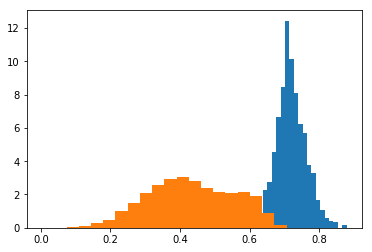

In [86]:
plt.hist(g_minus_r[red_mask], bins = 20, normed = True)
plt.hist(g_minus_r[~red_mask], bins = 20, normed = True)

In [87]:
rbin = np.logspace(np.log10(.1), np.log10(10), 20)

In [88]:
for i in range(19):
    print rbin[i] , rbin[i+1]

0.1 0.12742749857031338
0.12742749857031338 0.16237767391887217
0.16237767391887217 0.20691380811147897
0.20691380811147897 0.26366508987303583
0.26366508987303583 0.33598182862837817
0.33598182862837817 0.42813323987193935
0.42813323987193935 0.5455594781168519
0.5455594781168519 0.6951927961775606
0.6951927961775606 0.8858667904100825
0.8858667904100825 1.1288378916846888
1.1288378916846888 1.438449888287663
1.438449888287663 1.8329807108324356
1.8329807108324356 2.3357214690901213
2.3357214690901213 2.9763514416313175
2.9763514416313175 3.79269019073225
3.79269019073225 4.832930238571752
4.832930238571752 6.158482110660261
6.158482110660261 7.847599703514611
7.847599703514611 10.0


In [89]:
x0 , y0, z0 = x[0], y[0], z[0]

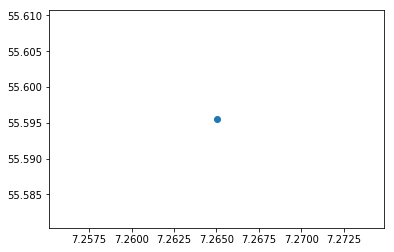

In [90]:
plt.scatter(x0, y0)

In [91]:
rmin , rmax = 0.1 , 1

In [93]:
D0 = ((x-x0)**2. + (y-y0)**2.+ (z-z0)**2)**.5

In [95]:
mask_distance = (D0>rmin)&(D0<rmax)

In [96]:
mask_distance

array([False,  True, False, ..., False, False, False])

Text(0,0.5,u'$g-r$')

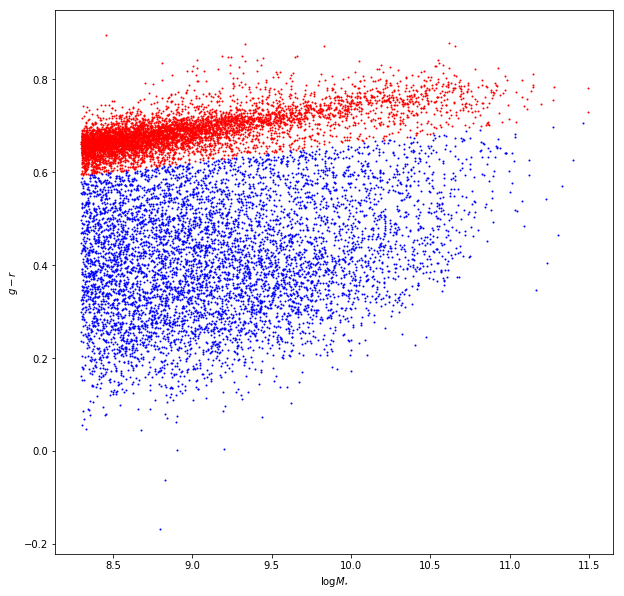

In [32]:
plt.figure(figsize=(10,10))

plt.scatter(logmstar[red_mask], g_minus_r[red_mask], s= 1. , c= "r")
plt.scatter(logmstar[~red_mask], g_minus_r[~red_mask], s= 1. , c= "b")
plt.xlabel(r"$\log M_{\star}$", fontsize = 10)
plt.ylabel(r"$g-r$", fontsize = 10)

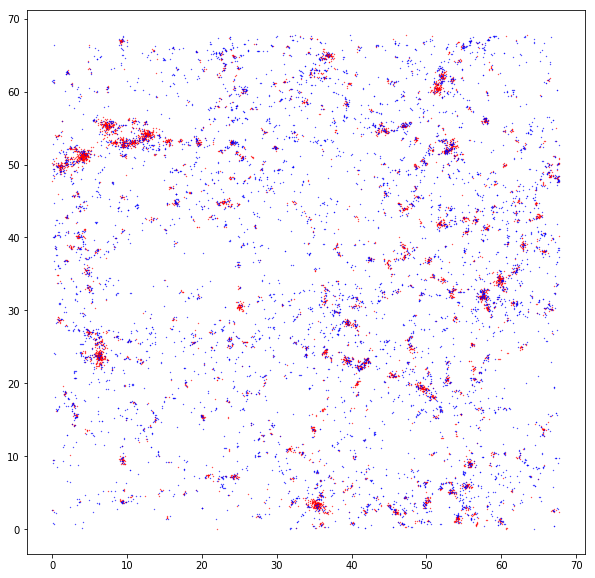

In [39]:
plt.figure(figsize=(10,10))
plt.scatter(x[red_mask],y[red_mask], s= 0.1, c= "r")
plt.scatter(x[~red_mask],y[~red_mask], s= 0.1, c= "b")

In [40]:
mstar_bins = [9.5,10,10.5,11]

In [44]:
data = np.vstack([x,y,z, logmstar, logmhalo, g_minus_r]).T

In [98]:
Q = np.array([True, False, True, False, True])*1.

In [99]:
Q

array([1., 0., 1., 0., 1.])

In [110]:
np.sum([Q], axis=1)

array([3.])

In [127]:
np.where([1])

(array([0]),)